# **Imports**

In [0]:
import numpy as np
import tensorflow as ts
import keras

from keras.preprocessing.image import img_to_array, load_img
from keras.applications.inception_resnet_v2 import InceptionResNetV2, decode_predictions,  preprocess_input
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input as preprocess_input_vgg19
from keras.applications.vgg19 import decode_predictions as decode_predictions_vgg19

from IPython.core.display import display



## **Constant**

In [0]:
FILE_1 = '01 Umbrella.jpg'
FILE_2 = '02 Couple.jpg'
FILE_3 = '03 Ocean.jpg'

In [0]:
FILE_1

'01 Umbrella.jpg'

In [0]:
# default size of thims model (299, 299)
# change resoluation
pic = load_img(FILE_1, target_size=(299, 299))

## **Preprocessing Images**

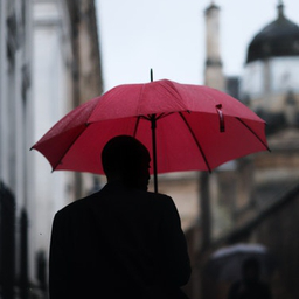

In [0]:
pic

In [0]:
#convert image to array
pic_array = img_to_array(pic)
pic_array.shape

(299, 299, 3)

function load image in default resoluation InceptionRestNetV2. covert the image to an array and return to preprocessed image forr the InceptionRestNetV2 model.

In [0]:
# InceptionResNetV2 model expected shape (299, 299, 3)
def format_img_inceptionrestnet(filename):
  pic = load_img(filename, target_size=(299,299))
  pic_array = img_to_array(pic)
  expanded = np.expand_dims(pic_array, axis=0)
  return preprocess_input(expanded)


In [0]:
# VGG19 model expected shape (224, 224, 3)
def format_img_vgg_19(filename):
  pic = load_img(filename, target_size=(224,224))
  pic_array = img_to_array(pic)
  expanded = np.expand_dims(pic_array, axis=0)
  return preprocess_input_vgg19(expanded)


## **Load InceptionRestNet**

In [0]:
%%time
inception_model = InceptionResNetV2(weights='imagenet')

CPU times: user 36.5 s, sys: 709 ms, total: 37.2 s
Wall time: 37.1 s


In [0]:
# model graph using tensorflow
inception_model.graph = ts.get_default_graph()

# Making Predictions

In [0]:
# expected input_1 to have 4 dimensions, but got array with shape (256, 256, 3)
# make 4 dimensions using numpy array
expanded =  np.expand_dims(pic_array, axis=0)
expanded.shape

(1, 299, 299, 3)

In [0]:
# preprocess image to correct prediction
preprocessed = preprocess_input(expanded)

In [0]:
prediction = inception_model.predict(preprocessed)

In [0]:
# decode prediction 
decode_predictions(prediction)

[[('n04507155', 'umbrella', 0.8292439),
  ('n03792972', 'mountain_tent', 0.001226825),
  ('n04479046', 'trench_coat', 0.0011062933),
  ('n03788195', 'mosque', 0.0010572324),
  ('n03220513', 'dome', 0.0010310971)]]

In [0]:
data = format_img_inceptionrestnet(FILE_2)

In [0]:
prediction = inception_model.predict(data)
decode_predictions(prediction)

[[('n10148035', 'groom', 0.7042382),
  ('n03450230', 'gown', 0.116695926),
  ('n11879895', 'rapeseed', 0.016582673),
  ('n09421951', 'sandbar', 0.012790691),
  ('n03534580', 'hoopskirt', 0.00728777)]]

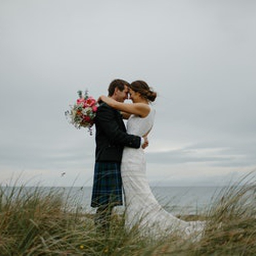

In [0]:
# not correct prediction to couple image
display(load_img(FILE_2))

# Testing the VGG19 Model (Visual geomentry group)

In [0]:
vgg_19_model = VGG19(weights='imagenet')

574717952/574710816 [==============================] - 12s 0us/step


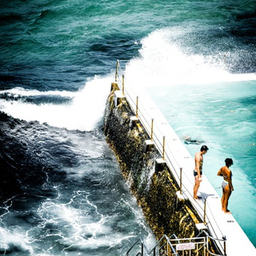

In [0]:
display(load_img(FILE_3))

In [0]:
data = format_img_vgg_19('06 Feet.jpg')
prediction = vgg_19_model.predict(data)
decode_predictions_vgg19(prediction)

[[('n07880968', 'burrito', 0.359748),
  ('n01817953', 'African_grey', 0.09527815),
  ('n03992509', "potter's_wheel", 0.047266252),
  ('n07860988', 'dough', 0.037686165),
  ('n01748264', 'Indian_cobra', 0.026607454)]]

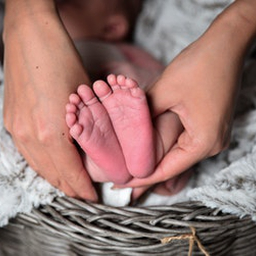

In [0]:
display(load_img('06 Feet.jpg'))

In [0]:
data = format_img_inceptionrestnet('06 Feet.jpg')
prediction = inception_model.predict(data)
decode_predictions(prediction)


[[('n03188531', 'diaper', 0.096486926),
  ('n03482405', 'hamper', 0.071163386),
  ('n02808304', 'bath_towel', 0.055679757),
  ('n04336792', 'stretcher', 0.053134654),
  ('n02808440', 'bathtub', 0.0450977)]]

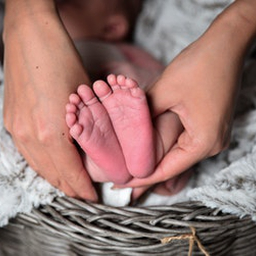

In [0]:
display(load_img('06 Feet.jpg'))